In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [2]:
# read the dataset from dir
df = pd.read_csv("../../datasets/diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [80]:
# Supervised or Unsupervised
# ans: Supervised->target column
# Regreesion or classification
# ans: classification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [81]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [82]:
# independent feature->'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
# dependent feature-> outcome

# descriptive statistics of the dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [83]:
# (row, columns)
df.shape

(100000, 9)

In [84]:
# distribution of outcome variable
df.diabetes.value_counts()*100/len(df)

diabetes
0    91.5
1     8.5
Name: count, dtype: float64

In [85]:
df['diabetes'].value_counts()*100/len(df)

diabetes
0    91.5
1     8.5
Name: count, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

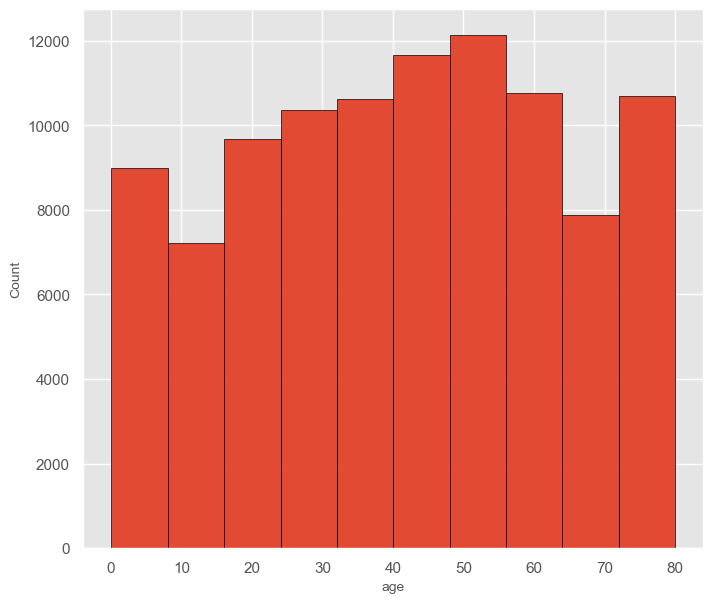

In [86]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['age'].hist(edgecolor="black")

In [87]:
# check duplicate data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [88]:
# droup duplicates data
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [89]:
df['age'].max()

80.0

In [90]:
df['age'].min()

0.08

In [91]:
print("MAX AGE: "+str(df['age'].max()))
print("MIN AGE: "+str(df['age'].min()))

MAX AGE: 80.0
MIN AGE: 0.08


In [92]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

<Axes: xlabel='blood_glucose_level', ylabel='Density'>

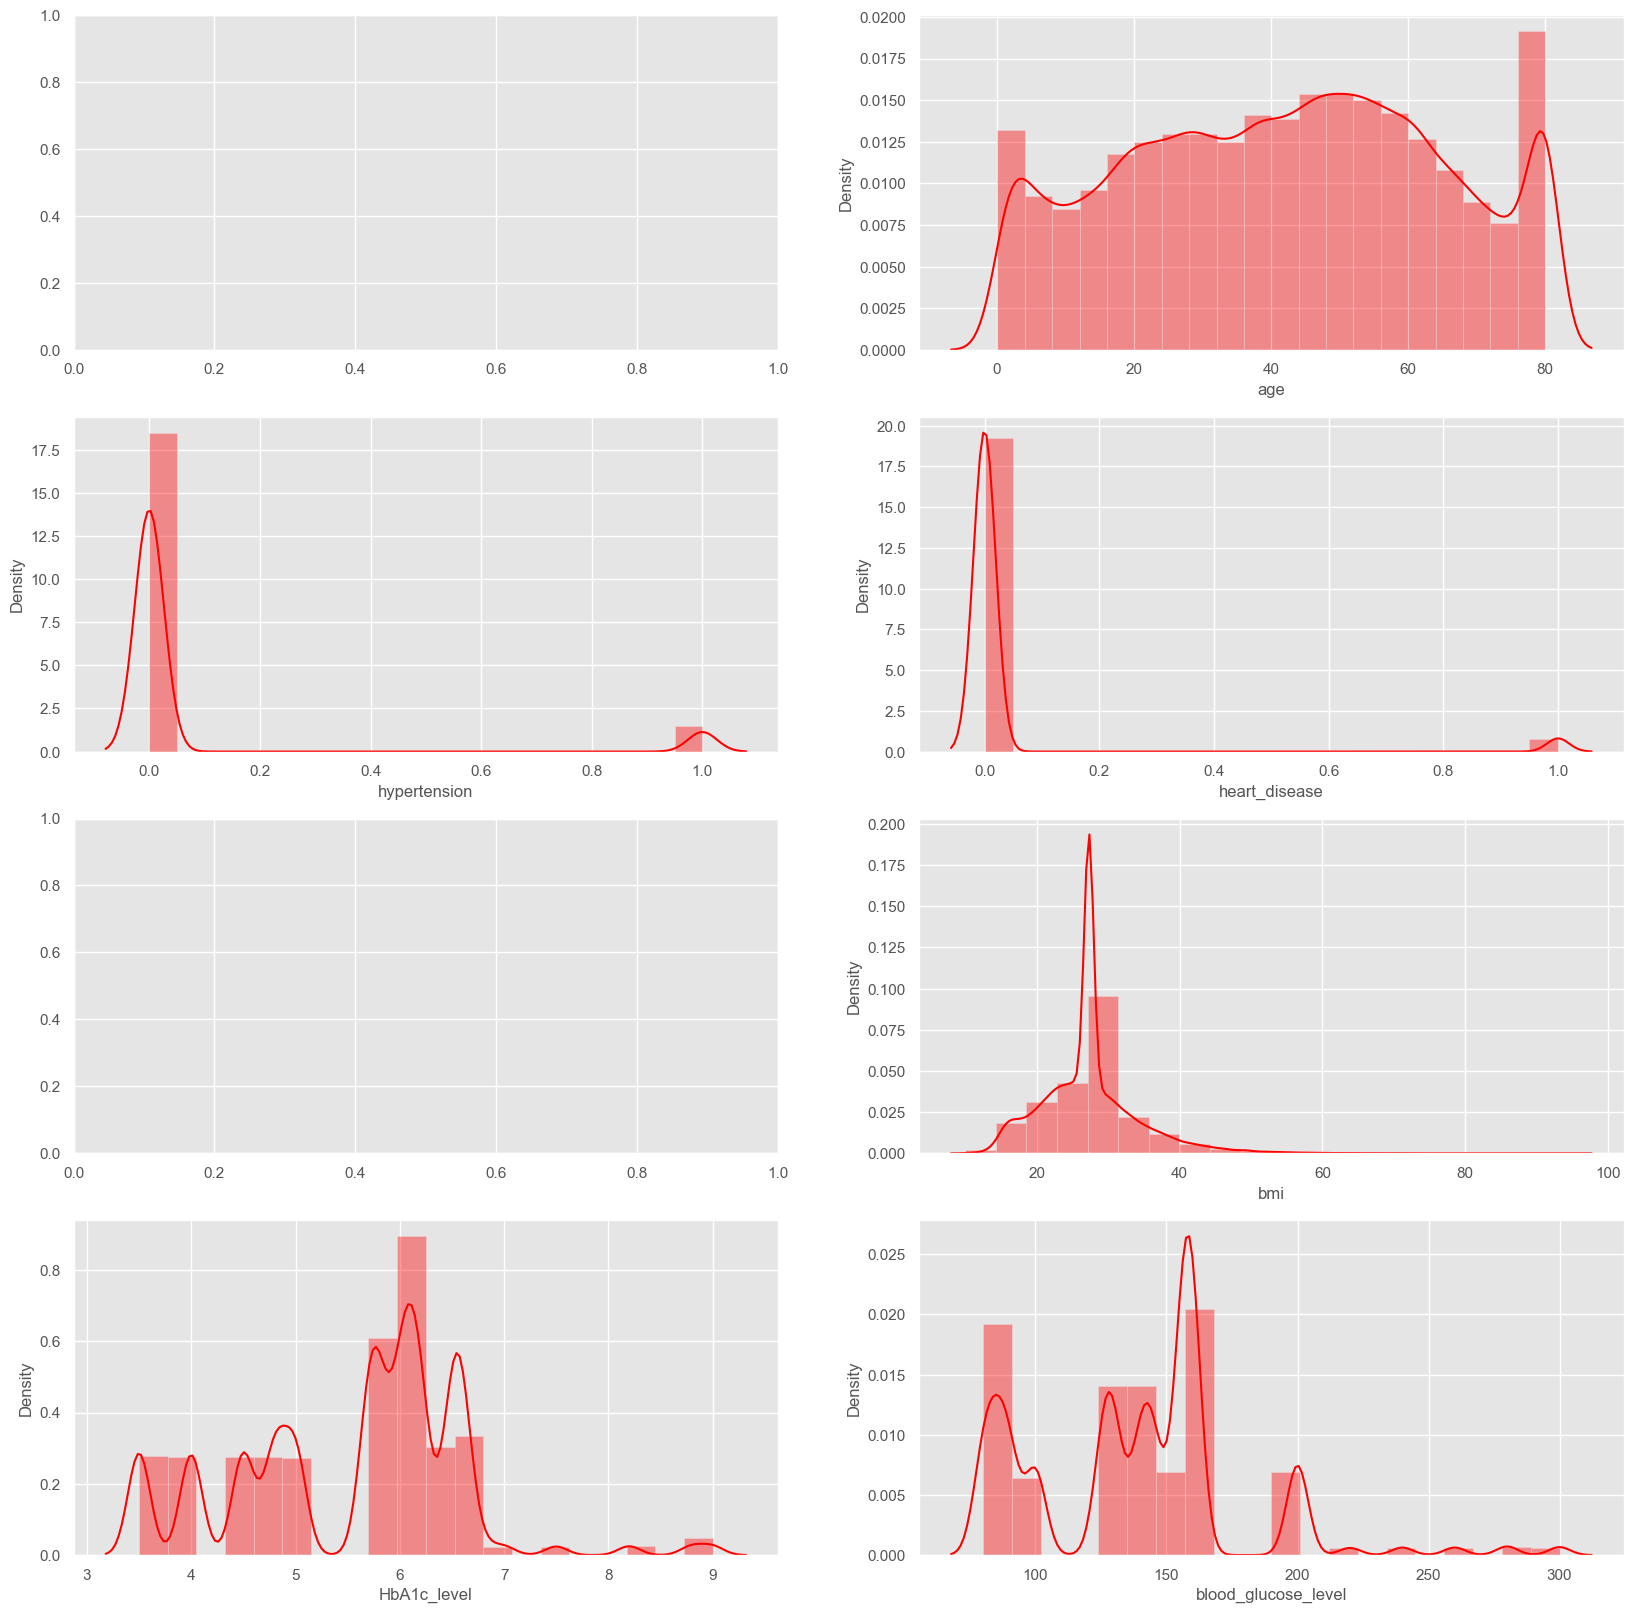

In [93]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
#sns.distplot(df.gender, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.age, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.hypertension, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.heart_disease, bins=20, ax=ax[1,1], color="red")
#sns.distplot(df.smoking_history, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.bmi, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.HbA1c_level, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.blood_glucose_level, bins=20, ax=ax[3,1], color="red")


In [94]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [95]:
df.groupby("diabetes").agg({'age':'mean'})

,age
diabetes,
0,40.115187
1,60.946588


In [96]:
df.groupby("diabetes").agg({'age':'max'})

,age
diabetes,
0,80.0
1,80.0


In [97]:
df.groupby("diabetes").agg({'hypertension':'mean'})

,hypertension
diabetes,
0,0.058984
1,0.245647


In [98]:
df.groupby("diabetes").agg({'hypertension':'max'})

,hypertension
diabetes,
0,1
1,1


In [99]:
df.groupby("diabetes").agg({'bmi':'max'})

,bmi
diabetes,
0,95.69
1,88.72


In [100]:
df.groupby("diabetes").agg({'bmi':'min'})

,bmi
diabetes,
0,10.01
1,10.98


In [101]:
df.groupby("diabetes").agg({'HbA1c_level':'max'})

,HbA1c_level
diabetes,
0,6.6
1,9.0


In [102]:
df.groupby("diabetes").agg({'HbA1c_level':'min'})

,HbA1c_level
diabetes,
0,3.5
1,5.7


In [103]:
df.groupby("diabetes").agg({'blood_glucose_level':'max'})

,blood_glucose_level
diabetes,
0,200
1,300


In [104]:
df.groupby("diabetes").agg({'blood_glucose_level':'min'})

,blood_glucose_level
diabetes,
0,80
1,126


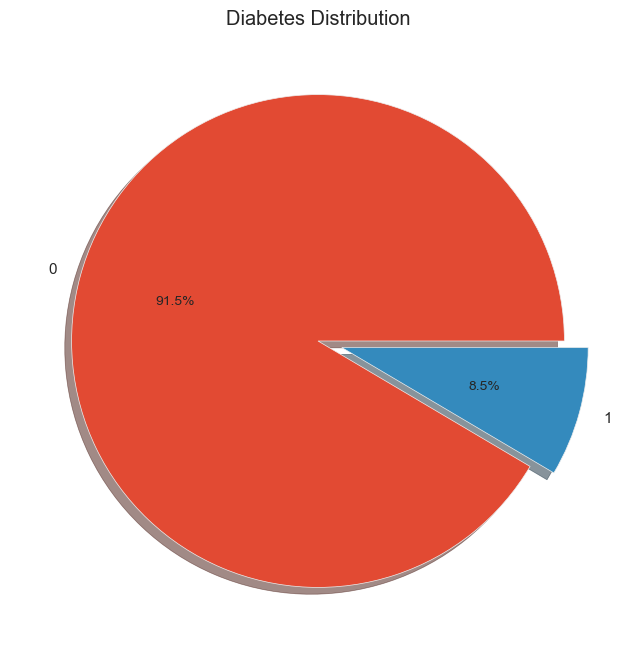

In [105]:
# 0>healthy
# 1>diabetes

f, ax = plt.subplots(figsize=(8,8))
df['diabetes'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax, shadow=True)
ax.set_title('Diabetes Distribution')
ax.set_ylabel('')
plt.show()


In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['diabetes'])
vif = pd.DataFrame()
vif["Feature"] = X_num.columns
vif["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
print(vif)


               Feature        VIF
0                  age   5.546292
1         hypertension   1.154728
2        heart_disease   1.105738
3                  bmi  15.574544
4          HbA1c_level  16.781626
5  blood_glucose_level  11.563033


In [107]:
# If p < 0.05, the feature is significantly associated with the target.
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['gender'], df['diabetes'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square Test for 'gender': p-value =", p)

contingency_table_smoking = pd.crosstab(df['smoking_history'], df['diabetes'])
chi2, p, dof, expected = chi2_contingency(contingency_table_smoking)
print("Chi-square Test for 'smoking_history': p-value =", p)


Chi-square Test for 'gender': p-value = 7.953383718307459e-32
Chi-square Test for 'smoking_history': p-value = 0.0


In [108]:
from sklearn.preprocessing import LabelEncoder

# Copy the DataFrame
df_encoded = df.copy()

# Encode categorical columns
label_encoder = LabelEncoder()
for column in df_encoded.select_dtypes(include=[object]).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()
print(correlation_matrix)


                       gender       age  hypertension  heart_disease  \
gender               1.000000 -0.030656      0.014203       0.077696   
age                 -0.030656  1.000000      0.251171       0.233354   
hypertension         0.014203  0.251171      1.000000       0.121262   
heart_disease        0.077696  0.233354      0.121262       1.000000   
smoking_history     -0.077919  0.228608      0.093177       0.027598   
bmi                 -0.022994  0.337396      0.147666       0.061198   
HbA1c_level          0.019957  0.101354      0.080939       0.067589   
blood_glucose_level  0.017199  0.110672      0.084429       0.070066   
diabetes             0.037411  0.258008      0.197823       0.171727   

                     smoking_history       bmi  HbA1c_level  \
gender                     -0.077919 -0.022994     0.019957   
age                         0.228608  0.337396     0.101354   
hypertension                0.093177  0.147666     0.080939   
heart_disease              

In [109]:
correlation_matrix.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.431178,-0.247426,-0.067351,-0.402627,-0.357495,-0.200273,-0.211609,-0.305615
age,-0.431178,1.000000,0.169614,0.103837,0.178361,0.367816,-0.196830,-0.176101,0.018759
hypertension,-0.247426,0.169614,1.000000,-0.062261,-0.079820,-0.002510,-0.169461,-0.162963,-0.040365
heart_disease,-0.067351,0.103837,-0.062261,1.000000,-0.234966,-0.206628,-0.183790,-0.180915,-0.093243
smoking_history,-0.402627,0.178361,-0.079820,-0.234966,1.000000,0.131665,-0.233081,-0.228487,-0.225103
bmi,-0.357495,0.367816,-0.002510,-0.206628,0.131665,1.000000,-0.170529,-0.152605,-0.008673
HbA1c_level,-0.200273,-0.196830,-0.169461,-0.183790,-0.233081,-0.170529,1.000000,0.124455,0.469026
blood_glucose_level,-0.211609,-0.176101,-0.162963,-0.180915,-0.228487,-0.152605,0.124455,1.000000,0.505796
diabetes,-0.305615,0.018759,-0.040365,-0.093243,-0.225103,-0.008673,0.469026,0.505796,1.000000


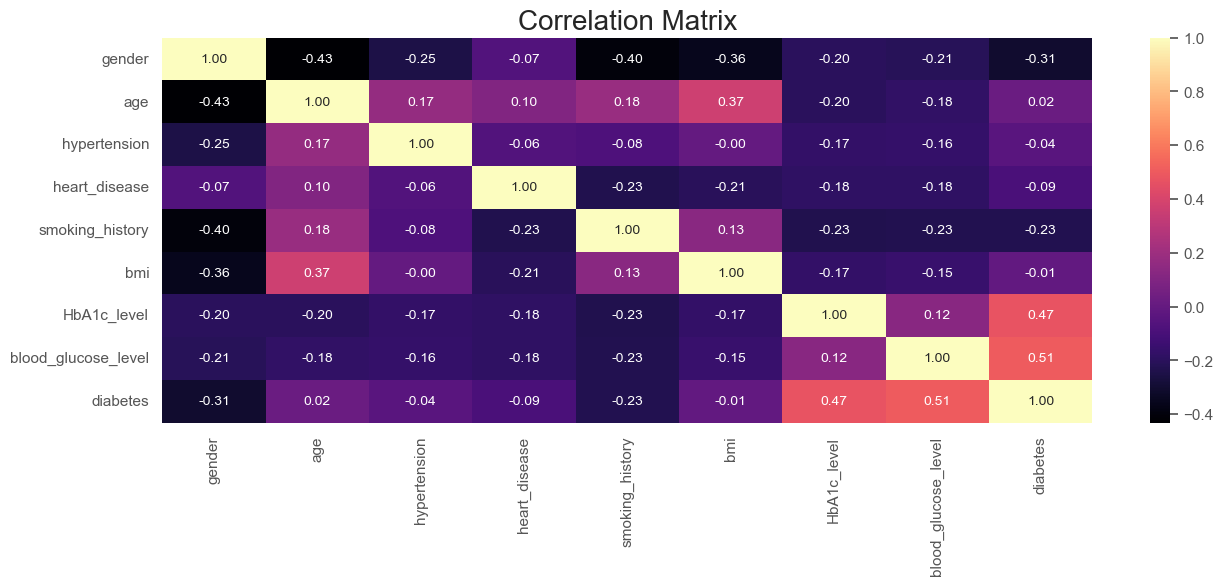

In [110]:
f,ax = plt.subplots(figsize=[15,5])
sns.heatmap(correlation_matrix.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [111]:
# EDA Part Completed
correlation_matrix.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [112]:
df[['age', 'bmi',
       'HbA1c_level', 'blood_glucose_level']] = df[['age', 'bmi',
       'HbA1c_level', 'blood_glucose_level']].replace(0, np.NaN)

In [113]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [114]:
# Data preprocessing Part
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [115]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


<Axes: >

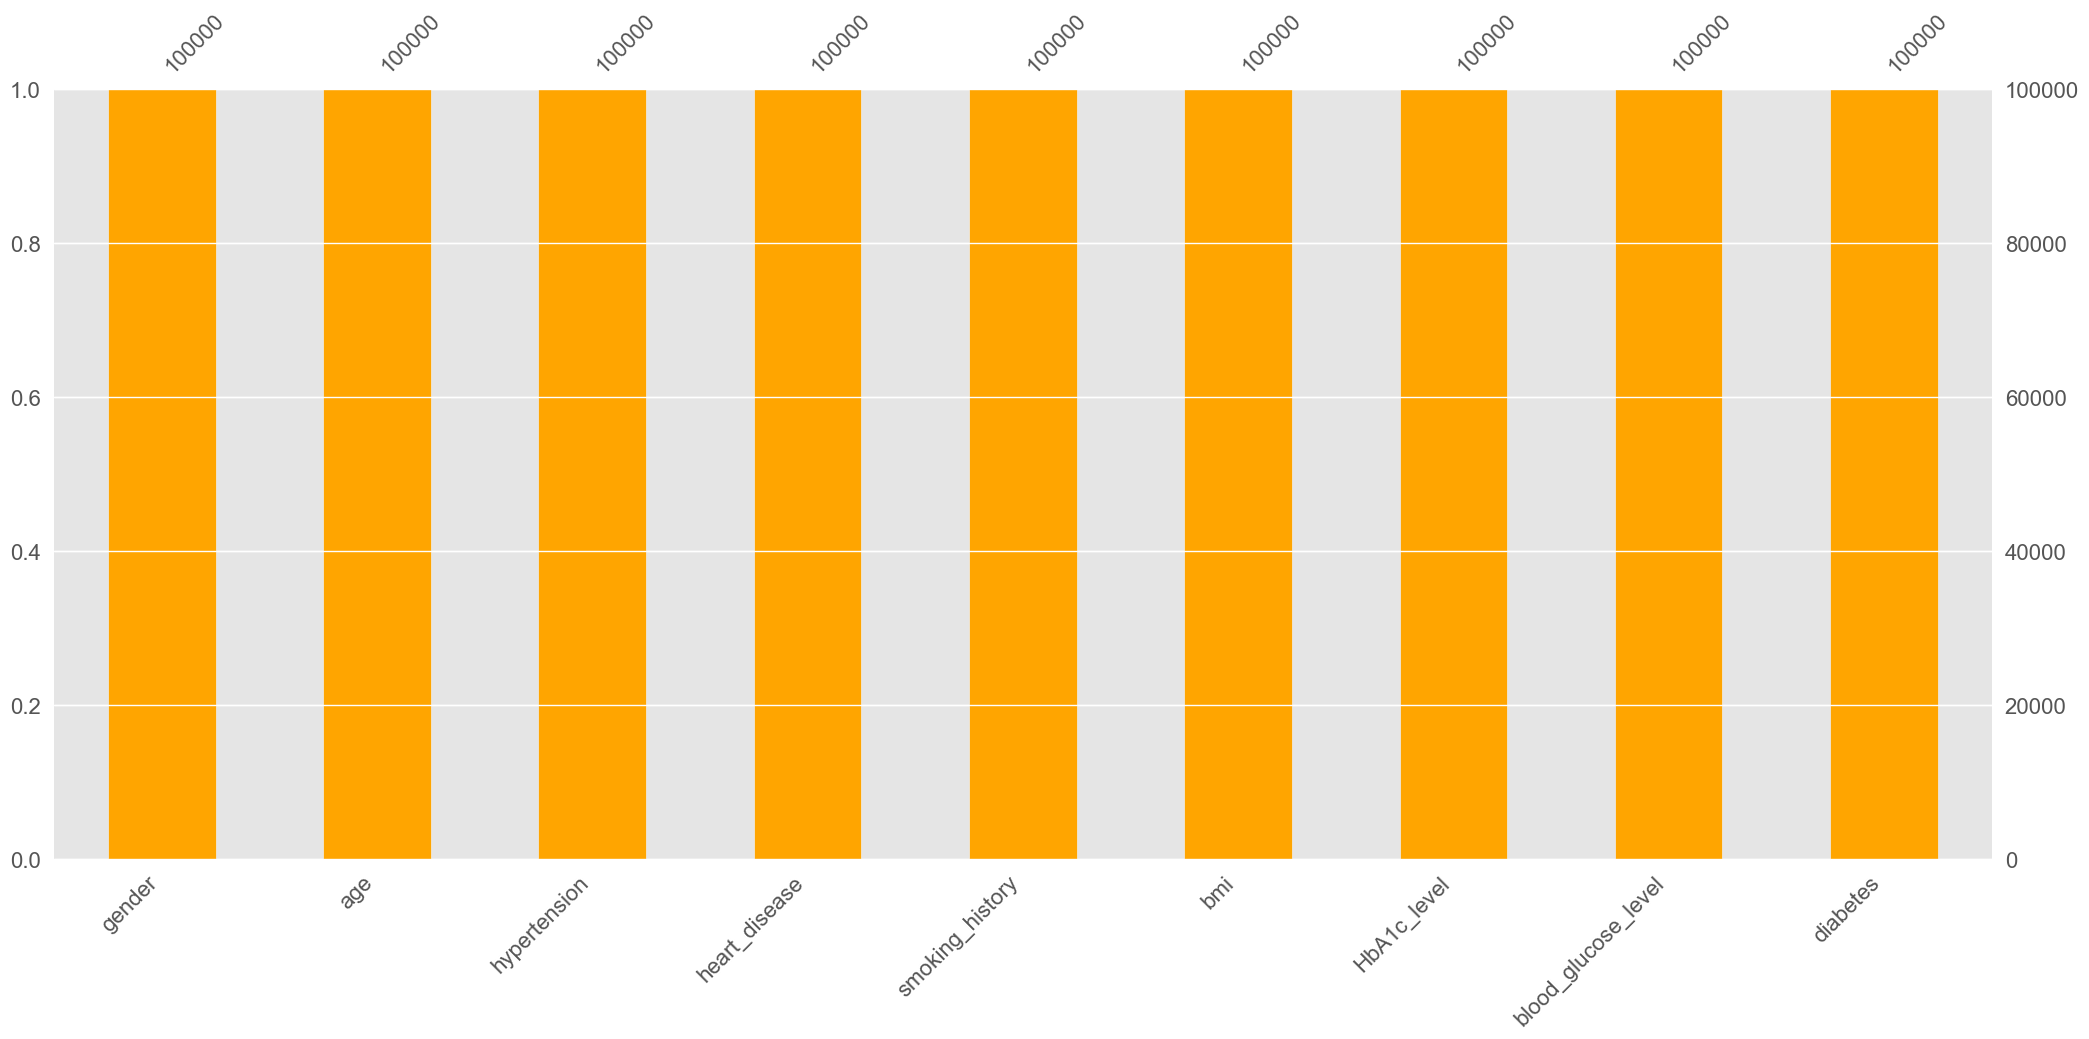

In [116]:
import missingno as msno
msno.bar(df, color="orange")

In [119]:
#median
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'diabetes']].groupby(['diabetes'])[[var]].median().reset_index()
    return temp

In [120]:
columns = df.columns
columns = columns.drop("diabetes")
for i in columns:
    median_target(i)
    df.loc[(df['diabetes'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['diabetes'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

TypeError: agg function failed [how->median,dtype->object]

In [121]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [122]:

df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

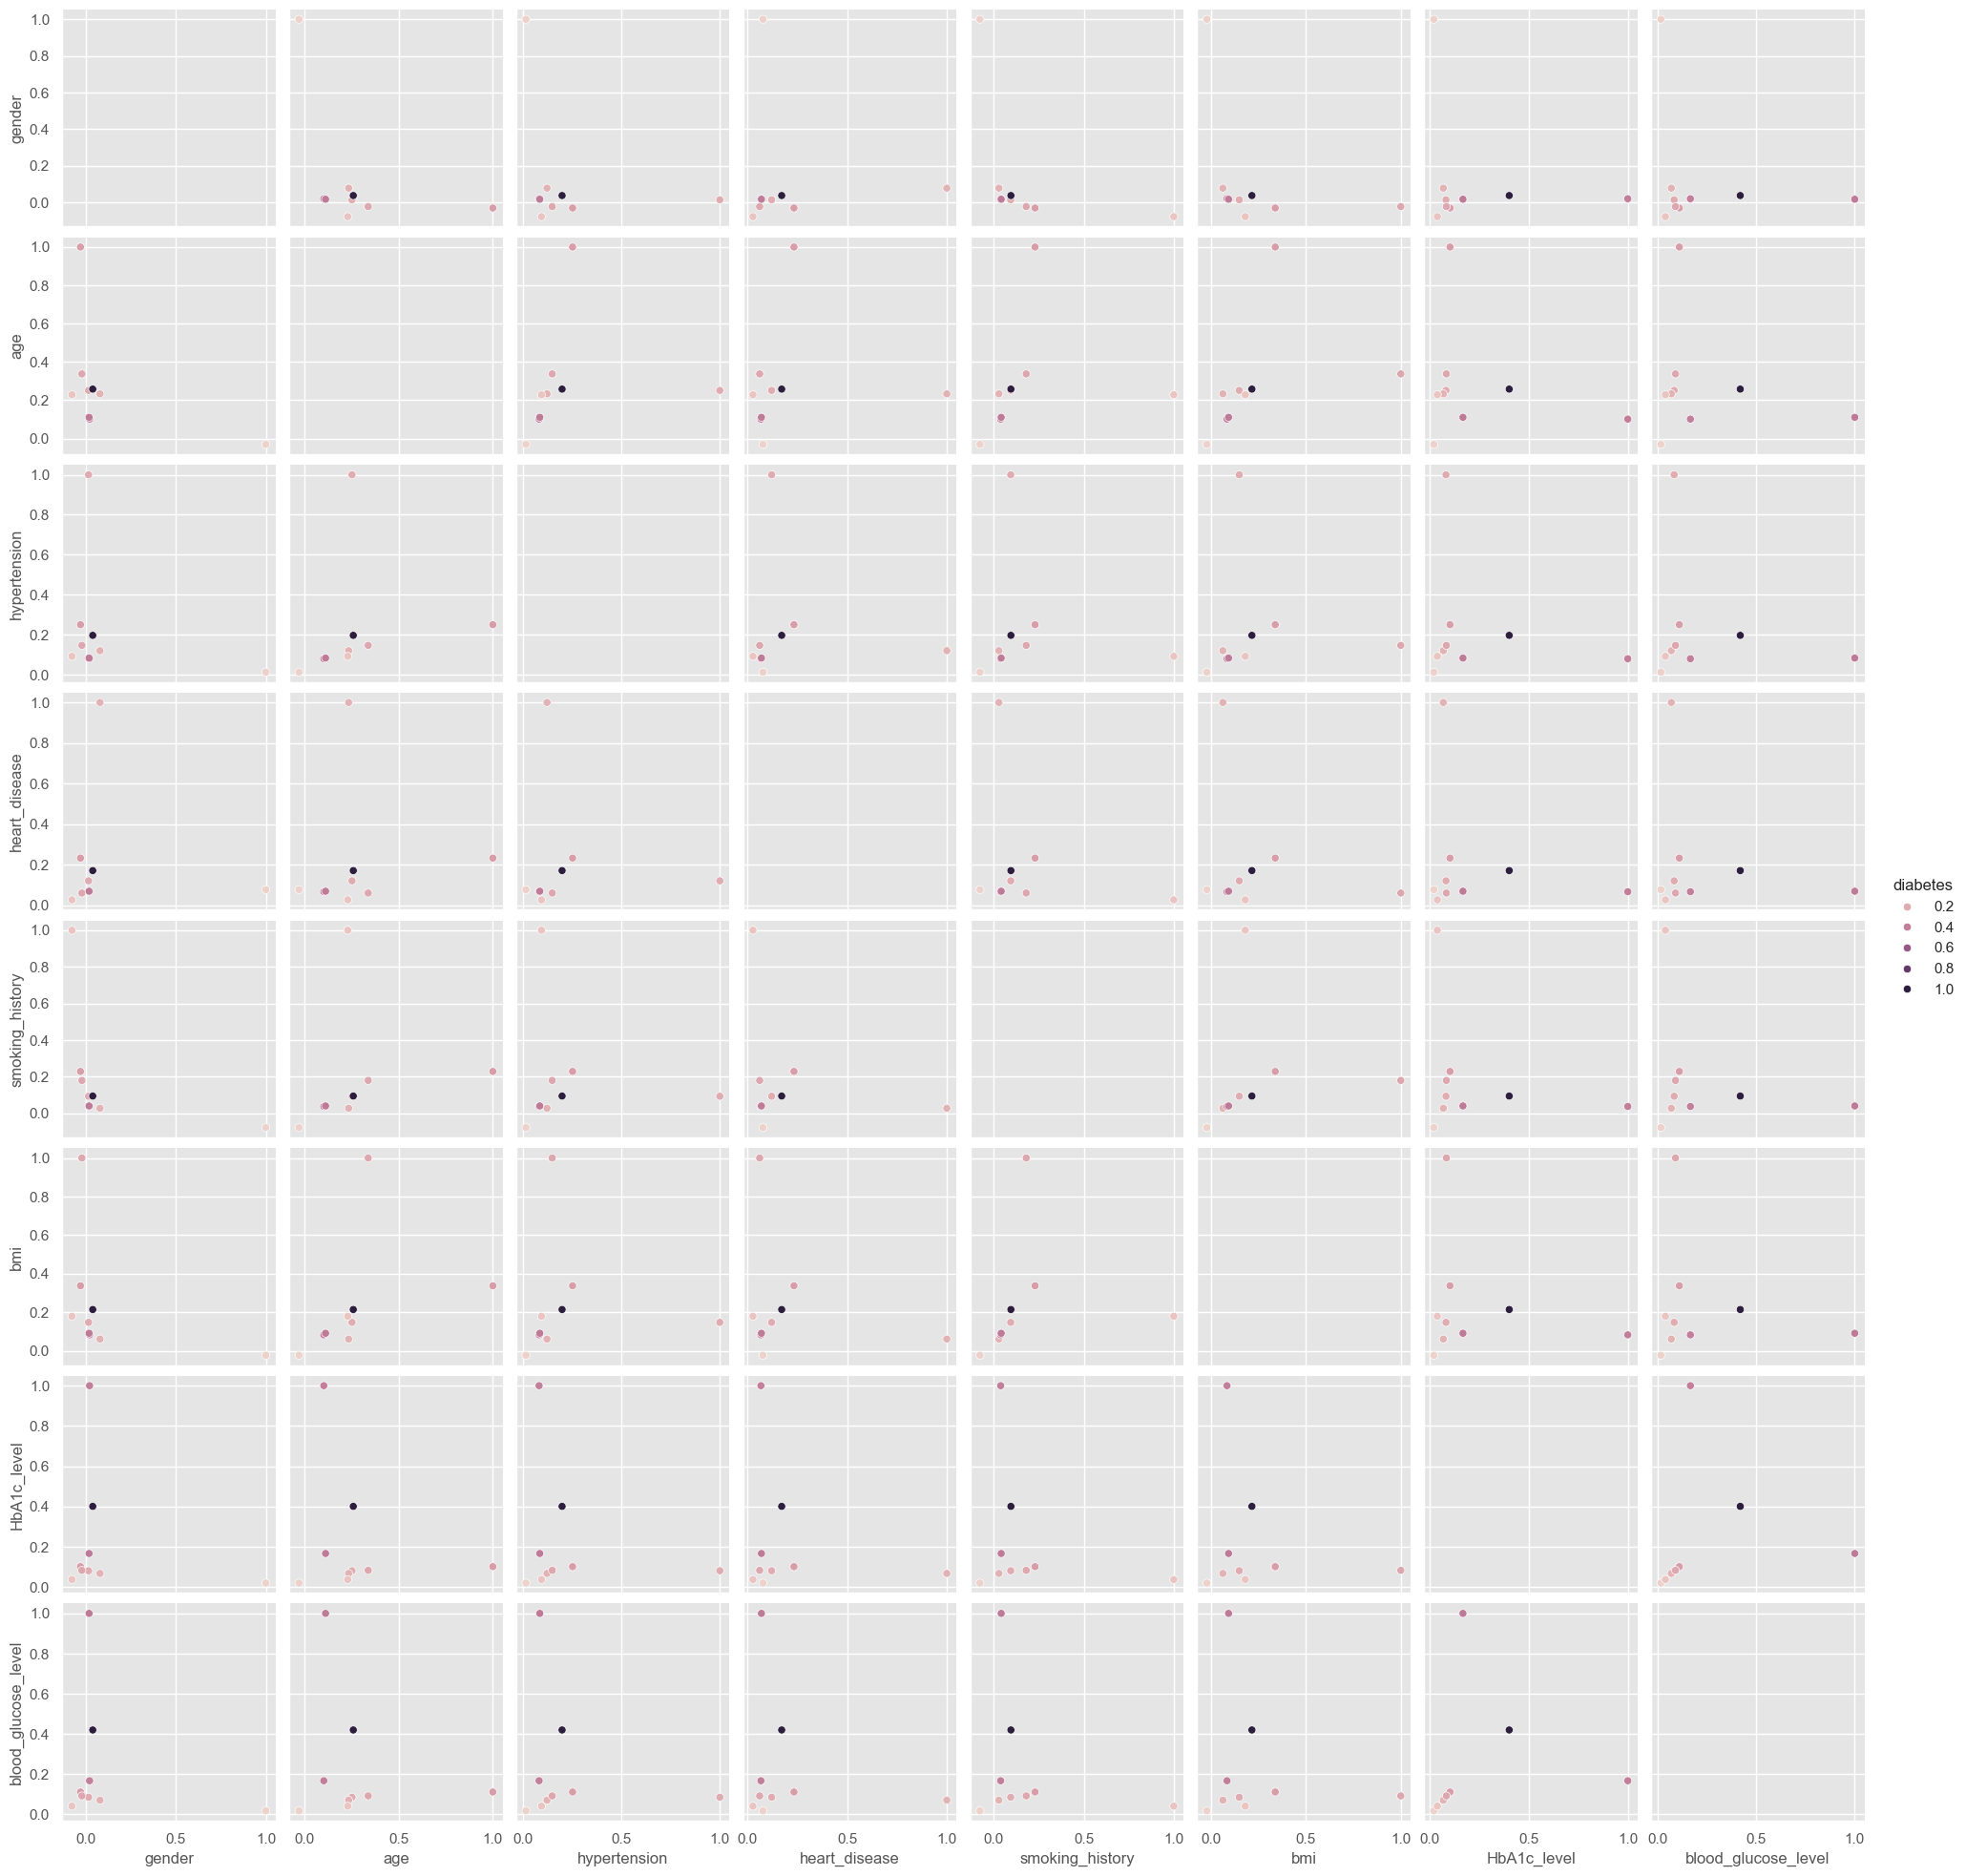

In [ ]:
# pair plot
p = sns.pairplot(df, hue="diabetes")

In [124]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [92]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [ ]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [ ]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

In [98]:
thresold = np.sort(df_scores)[7]

In [ ]:
thresold

In [100]:
outlier = df_scores>thresold

In [101]:
df = df[outlier]

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [106]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [ ]:
NewBMI

In [108]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [ ]:
df.head()

In [110]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [111]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [ ]:
df.head()

In [113]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
df.head()

In [115]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [ ]:
df.head()

In [ ]:
df.columns

In [118]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [ ]:
categorical_df.head()

In [120]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [121]:
cols = X.columns
index = X.index

In [ ]:
X.head()

In [123]:
# save cleaned DataFrame as csv
X.to_csv('../../cleaned_datasets/cleaned_diabetes.csv', index=False)

In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X.head()

In [175]:
X = pd.concat([X, categorical_df], axis=1)

In [ ]:
X.head()

In [177]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [178]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [181]:
# Machine Learning Algo

In [182]:
# Logistic Regreesion

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

In [183]:
y_pred = log_reg.predict(X_test)

In [ ]:
accuracy_score(y_train, log_reg.predict(X_train))

In [215]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [190]:
# KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# SVM
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

In [ ]:
# best_parameter
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Decision Tree

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

In [ ]:
grid_search_dt.best_params_

In [ ]:
grid_search_dt.best_score_

In [ ]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

In [204]:
y_pred = rand_clf.predict(X_test)

In [ ]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

In [ ]:
grid_search_gbc.best_params_

In [ ]:
grid_search_gbc.best_score_

In [ ]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

In [ ]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

In [ ]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4), 100*round(dt_acc,4), 100*round(rand_acc,4), 
              100*round(gbc_acc,4), 100*round(xgb_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

In [225]:
import pickle
model = gbc_acc
pickle.dump(model, open("diabetes.pkl",'wb'))

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()